# Resampling Datetime Data

Work with a modified version of weather data from London from Kaggle, here: 

https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv

**Part 1 Goal: Load data and make a datetime index**
1. Convert the date column to datetime dtype.
2. Set the date column as the index.
3. Filter out only the required data. Keep only data from the year 2000 or later.
4. Keep only the following features: precipitation, mean_temp, min_temp, max_temp, snow_depth
5. Impute any missing values.

**Part 2 Goal: Answer the Questions with Visualizations**

For each of the following questions, make a new copy of the dataframe resampled to the correct frequency for the question.
- Q1: Q1: What month had the most precipitation between 2000 through 2010?
    - Resample the data as Monthly frequency.
    - Find the date and corresponding value for the max precipitation.
    - Plot the feature and time period that corresponds to the question.
    - Determine the date and value for the most precipitation (the max precipitation).
    - Add a vertical line at this date with a label that says the date (using date format: "April 2000") and the max precipitation value. Make sure to add a legend so that the label is visible.
    
NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled. To get around this issue, first, create your fig and ax using plt.subplots(), then use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

```
fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)
```

- Q2: Which year between 2000-2020 had the coolest average temperature?
    - Resample the data as Yearly frequency.
    - Plot the feature and time period that corresponds to the question.
    - Determine the date and value for the lowest mean temp.
    - Add a vertical line at this date with a label that says the date (using date format: "2000") and the lowest mean temperature value.



# 0 Preliminary Steps

In [2]:
# imports
import pandas as pd
import datetime as dt
from matplotlib import dates as mdates
import matplotlib.pyplot as plt

In [3]:
# load data
df = pd.read_csv('https://docs.google.com/spreadsheets/d/e/2PACX-1vT_jChgNsQbHbg4TGepzIqk8XC9DTIKmyyxb1upo5cfZCgbfIUQc2ZC0YMzuU5uApP140Ob49KBjdqh/pub?gid=1198589591&single=true&output=csv')

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


In [4]:
# save copy of df if needed
df_copy = df.copy()

# 1 Part 1: Load data and make a datetime index

## 1.1 Convert the date column to datetime dtype.

In [5]:
# convert column to new column of datetime objects
df['datetime'] = pd.to_datetime(df['date'])

# check
print(df['datetime'].dtype)
df['datetime'].head()

datetime64[ns]


0   1970-01-01 00:00:00.019790101
1   1970-01-01 00:00:00.019790102
2   1970-01-01 00:00:00.019790103
3   1970-01-01 00:00:00.019790104
4   1970-01-01 00:00:00.019790105
Name: datetime, dtype: datetime64[ns]

In [6]:
# correct the formatting
df['datetime'] = pd.to_datetime(df['date'], format='%Y%m%d')

# check
print(df['datetime'].dtype)
df['datetime'].head()

datetime64[ns]


0   1979-01-01
1   1979-01-02
2   1979-01-03
3   1979-01-04
4   1979-01-05
Name: datetime, dtype: datetime64[ns]

In [7]:
# drop 'date' column and convert 'datetime' to 'date'
df = df.drop(columns = ['date'])
df = df.rename(columns = {'datetime': 'date'})

# check
df.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth', 'date'],
      dtype='object')

## 1.2 Set the date column as the index.

In [8]:
# set index on 'date' column
df = df.set_index('date')

# check
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15341 entries, 1979-01-01 to 2020-12-31
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cloud_cover       14938 non-null  float64
 1   sunshine          14957 non-null  float64
 2   global_radiation  14939 non-null  float64
 3   max_temp          14951 non-null  float64
 4   mean_temp         14922 non-null  float64
 5   min_temp          14955 non-null  float64
 6   precipitation     14951 non-null  float64
 7   pressure          14953 non-null  float64
 8   snow_depth        13589 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0


## 1.3 Filter out only the required data.

Keep only data from the year 2000 or later. Keep only the following features: precipitation, mean_temp, min_temp, max_temp, and snow_depth.

In [9]:
# check columns
df.columns

Index(['cloud_cover', 'sunshine', 'global_radiation', 'max_temp', 'mean_temp',
       'min_temp', 'precipitation', 'pressure', 'snow_depth'],
      dtype='object')

In [10]:
# filter for year 2000 and later, and for necessary columns
filtered_df = df.loc['2000':, ['precipitation',
                              'mean_temp',
                              'min_temp',
                              'max_temp',
                              'snow_depth']]

# check
filtered_df.info()
filtered_df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7281 non-null   float64
 1   mean_temp      7252 non-null   float64
 2   min_temp       7285 non-null   float64
 3   max_temp       7281 non-null   float64
 4   snow_depth     5919 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0


In [11]:
# check filter by checking min index
filtered_df.index.min()

Timestamp('2000-01-01 00:00:00')

In [12]:
# rename filtered_df to df for easier code
df = filtered_df.copy()

## 1.4 Impute any missing values.

In [13]:
# check missing values
df.isna().sum()

precipitation     390
mean_temp         419
min_temp          386
max_temp          390
snow_depth       1752
dtype: int64

For the temperature features, interpolation makes sense. For precipitation and snow depth, though, it does not. Instead we will impute 0 as a stand-in for the missing data in those columns.

In [14]:
# temperature features: interpolate
df['min_temp'] = df['min_temp'].interpolate()
df['mean_temp'] = df['mean_temp'].interpolate()
df['max_temp'] = df['max_temp'].interpolate()

# precipitation and snow depth: impute 0
df['precipitation'] = df['precipitation'].fillna(0)
df['snow_depth'] = df['snow_depth'].fillna(0)

# check
df.isna().sum()

precipitation    0
mean_temp        0
min_temp         0
max_temp         0
snow_depth       0
dtype: int64

# 2 Part 2: Answer questions with visualizations

## 2.1 Question 1: What month had the most precipitation between 2000 through 2010?

Steps:
1. Resample the data as Monthly frequency.
2. Find the date and corresponding value for the max precipitation.
3. Plot the feature and time period that corresponds to the question.
    - Add a vertical line at the date of max precipitation with a label that says the date (using date format: "April 2000") and the max precipitation value. Make sure to add a legend so that the label is visible.
    
NOTE: Pandas' .plot method currently has a bug with 4-digit year axis labels. The tick labels misbehave when being formatted with matplotlib and will produce a mostly-blank axis with 1 year labeled. To get around this issue, first, create your fig and ax using plt.subplots(), then use pandas .plot method to plot this figure by adding the argument "ax=ax" to .plot().

```
fig, ax = plt.subplots(figsize=(12,3))
df.plot(ax=ax)
```


### 2.1.1 Resample the data as Monthly frequency

The instructions don't stipulate an aggregate function for resampling, so I will use the mean. I will set the dates for each measurement as the first of the month.

In [15]:
# create series for precipitation only
ts = df['precipitation'].copy()

# check
ts.head()

date
2000-01-01    0.0
2000-01-02    0.2
2000-01-03    6.0
2000-01-04    0.2
2000-01-05    0.8
Name: precipitation, dtype: float64

In [16]:
# limit series to years 2000-2010
ts = ts.loc['2000':'2010']

# check
print(ts.index.min())
print(ts.index.max())

2000-01-01 00:00:00
2010-12-31 00:00:00


In [17]:
# check beginning of month numbers
ts_beg_month = ts.asfreq("MS")
ts_beg_month.head()

date
2000-01-01    0.0
2000-02-01    9.8
2000-03-01    0.2
2000-04-01    0.6
2000-05-01    0.0
Freq: MS, Name: precipitation, dtype: float64

In [18]:
# resample with monthly frequency; take mean of month
ts = ts.resample("MS").mean()

# check
ts.head()

date
2000-01-01    0.461290
2000-02-01    2.144828
2000-03-01    0.432258
2000-04-01    2.393333
2000-05-01    2.206452
Freq: MS, Name: precipitation, dtype: float64

### 2.1.2 Find the date and corresponding value for the max precipitation.

In [19]:
# find date
max_precip_date = ts.idxmax()

# check
max_precip_date

Timestamp('2009-11-01 00:00:00', freq='MS')

In [20]:
# find value
ts.loc[max_precip_date]

4.613333333333333

### 2.1.3 Plot the feature and time period that corresponds to the question.

Add a vertical line at the date with max precipitation with a label that says the date (using date format: "April 2000") and the max precipitation value. Make sure to add a legend so that the label is visible.

Feature: precipitation

Time period: 2000-2010

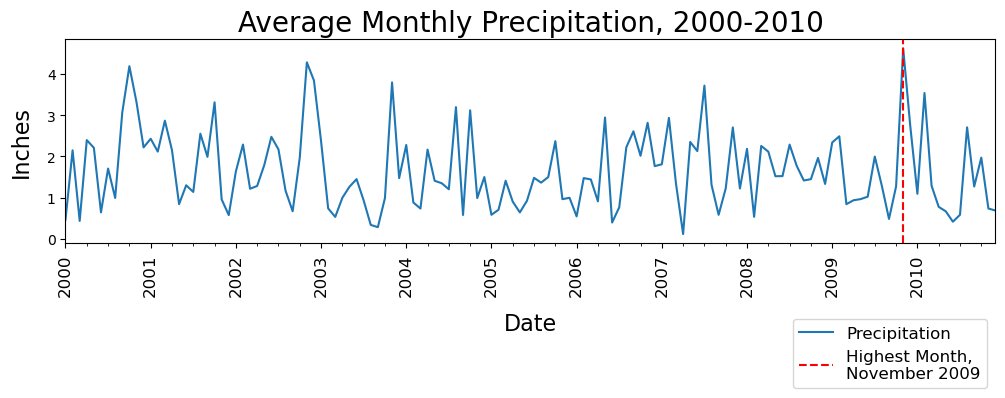

In [21]:
# set subplots figsize
fig, ax = plt.subplots(figsize = (12, 3))

# cusomize major x-axis ticks
# one tick every year
major_ticks_loc = mdates.YearLocator(1)
# 4-digit-year labels
major_ticks_format = mdates.DateFormatter('%Y')
# set locator and formatter
ax.xaxis.set_major_locator(major_ticks_loc)
ax.xaxis.set_major_formatter(major_ticks_format)

# customize minor x-axis ticks
# one tick every 3 months
minor_ticks_loc = mdates.MonthLocator(interval = 3)
# no minor tick labels
# set locator (no formatter)
ax.xaxis.set_minor_locator(minor_ticks_loc)

# plot
ts.plot(ax = ax)

# rotate major tick labels on x-axis 90 degrees
fig.autofmt_xdate(which = 'major',
                 rotation = 90)

# set title and axis labels
ax.set_title('Average Monthly Precipitation, 2000-2010',
            fontsize = 20)
ax.set_ylabel('Inches',
             fontsize = 16,
             labelpad = 10)
ax.set_xlabel('Date',
             fontsize = 16,
             labelpad = 12)

# make year labels on major ticks on x-axis centered
for label in ax.xaxis.get_majorticklabels():
    label.set_horizontalalignment('center')
    
# set fontsize for major x-axis ticks
ax.tick_params(axis = 'x',
              which = 'major',
              labelsize = 12)
    
# add vertical line at max_precip_date
ax.axvline(x = max_precip_date, 
          color = 'r', 
          linestyle = '--',
          label = f'Highest Month,\n{max_precip_date:%B %Y}')

# capitalize words in legend 
handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]

# add legend
ax.legend(handles,
          labels,
          loc = 'lower right',
          bbox_to_anchor = (1.0, -0.75),
          prop = {'size': 12});

## 2.2 Question 2: Which year between 2000-2020 had the coolest average temperature?

Steps:
1. Resample the data as Yearly frequency.
2. Find the date and corresponding value for the lowest mean temp.
3. Plot the feature and time period that corresponds to the question.
    - Add a vertical line at the date with the lowest mean temp with a label that says the date (using date format: "2000") and the lowest mean temperature value.

### 2.2.1 Resample the data as Yearly frequency

The instructions don't stipulate an aggregate function for resampling, so I will use the mean. I will set the dates for each measurement as the first of the year.

In [22]:
# create series for mean temp only
ts = df['mean_temp'].copy()

# check
ts.head()

date
2000-01-01    7.0
2000-01-02    7.9
2000-01-03    9.4
2000-01-04    7.0
2000-01-05    6.4
Name: mean_temp, dtype: float64

In [23]:
# limit series to years 2000-2020
ts = ts.loc['2000':'2020']

# check
print(ts.index.min())
print(ts.index.max())

2000-01-01 00:00:00
2020-12-31 00:00:00


In [24]:
# check beginning of year numbers
ts_beg_month = ts.asfreq("AS")
ts_beg_month.head()

date
2000-01-01    7.0
2001-01-01    5.3
2002-01-01   -0.8
2003-01-01    8.3
2004-01-01    4.3
Freq: AS-JAN, Name: mean_temp, dtype: float64

In [25]:
# resample with yearly frequency; take mean of year
ts = ts.resample("AS").mean()

# check
ts.head()

date
2000-01-01    11.575683
2001-01-01    11.331507
2002-01-01    12.084247
2003-01-01    12.114521
2004-01-01    11.900683
Freq: AS-JAN, Name: mean_temp, dtype: float64

### 2.2.2 Find the date and corresponding value for the lowest mean temp

In [26]:
# find date
min_mean_temp_date = ts.idxmin()

# check
min_mean_temp_date

Timestamp('2010-01-01 00:00:00', freq='AS-JAN')

In [27]:
# find value
ts.loc[min_mean_temp_date]

10.657397260273973

### 2.2.3 Plot the feature and time period that corresponds to the question

Add a vertical line at the date with the lowest mean temp with a label that says the date (using date format: "2000") and the lowest mean temperature value.

Feature: mean temp

Time period: 2000-2020

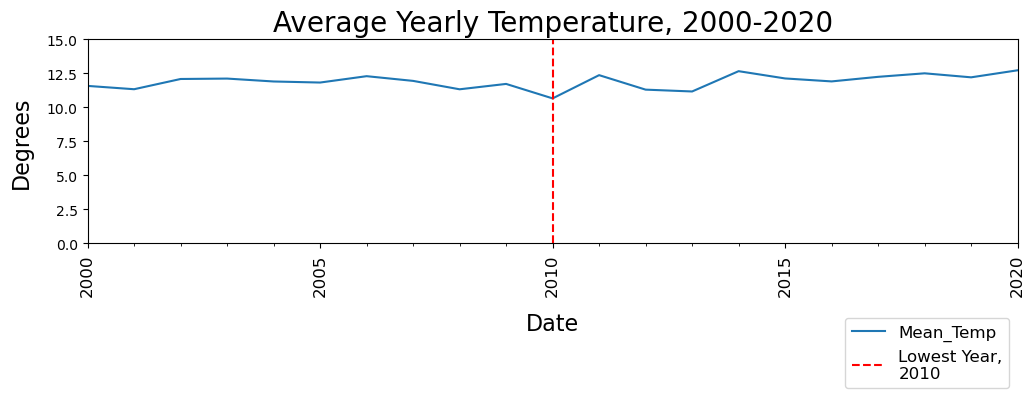

In [28]:
# set subplots figsize
fig, ax = plt.subplots(figsize = (12, 3))

# cusomize major x-axis ticks
# one tick every year
major_ticks_loc = mdates.YearLocator(5)
# 4-digit-year labels
major_ticks_format = mdates.DateFormatter('%Y')
# set locator and formatter
ax.xaxis.set_major_locator(major_ticks_loc)
ax.xaxis.set_major_formatter(major_ticks_format)

# customize minor x-axis ticks
# one tick every 3 months
minor_ticks_loc = mdates.YearLocator(1)
# no minor tick labels
# set locator (no formatter)
ax.xaxis.set_minor_locator(minor_ticks_loc)

# plot
ts.plot(ax = ax)

# rotate major tick labels on x-axis 90 degrees
fig.autofmt_xdate(which = 'major',
                 rotation = 90)

# set title and axis labels
ax.set_title('Average Yearly Temperature, 2000-2020',
            fontsize = 20)
ax.set_ylabel('Degrees',
             fontsize = 16,
             labelpad = 10)
ax.set_xlabel('Date',
             fontsize = 16,
             labelpad = 12)
ax.set_ylim(bottom = 0,
           top = 15)

# make year labels on major ticks on x-axis centered
for label in ax.xaxis.get_majorticklabels():
    label.set_horizontalalignment('center')
    
# set fontsize for major x-axis ticks
ax.tick_params(axis = 'x',
              which = 'major',
              labelsize = 12)
    
# add vertical line at max_precip_date
ax.axvline(x = min_mean_temp_date, 
          color = 'r', 
          linestyle = '--',
          label = f'Lowest Year,\n{min_mean_temp_date:%Y}')

# capitalize words in legend 
handles, labels = ax.get_legend_handles_labels()
labels = [label.title() for label in labels]

# add legend
ax.legend(handles,
          labels,
          loc = 'lower right',
          bbox_to_anchor = (1.0, -0.75),
          prop = {'size': 12});